# Credit Card Fraud Detection

Throughout the financial sector, machine learning algorithms are being developed to detect fraudulent transactions.  In this project, that is exactly what we are going to be doing as well.  Using a dataset of of nearly 28,500 credit card transactions and multiple unsupervised anomaly detection algorithms, we are going to identify transactions with a high probability of being credit card fraud.  In this project, we will build and deploy the following two machine learning algorithms:

* Local Outlier Factor (LOF)
* Isolation Forest Algorithm

Furthermore, using metrics suchs as precision, recall, and F1-scores, we will investigate why the classification accuracy for these algorithms can be misleading.

In addition, we will explore the use of data visualization techniques common in data science, such as parameter histograms and correlation matrices, to gain a better understanding of the underlying distribution of data in our data set. Let's get started!

## 1. Importing Necessary Libraries

To start, let's print out the version numbers of all the libraries we will be using in this project. This serves two purposes - it ensures we have installed the libraries correctly and ensures that this tutorial will be reproducible. 

In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))


Python: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]
Numpy: 1.16.2
Pandas: 0.23.4
Matplotlib: 3.0.3
Seaborn: 0.9.0
Scipy: 1.1.0


In [2]:
import pandas as pd
import time

In [3]:
start = time.time()

dataset = pd.read_csv("../input/creditcardfraud/creditcard.csv")

end = time.time()

print(end-start)

3.484936475753784


In [4]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. The Data Set

In the following cells, we will import our dataset from a .csv file as a Pandas DataFrame.  Furthermore, we will begin exploring the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset.  For this purpose, we will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix. 

In [6]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [7]:
data.shape

(284807, 31)

In [8]:
data.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
print(type(data["Time"]))

<class 'pandas.core.series.Series'>


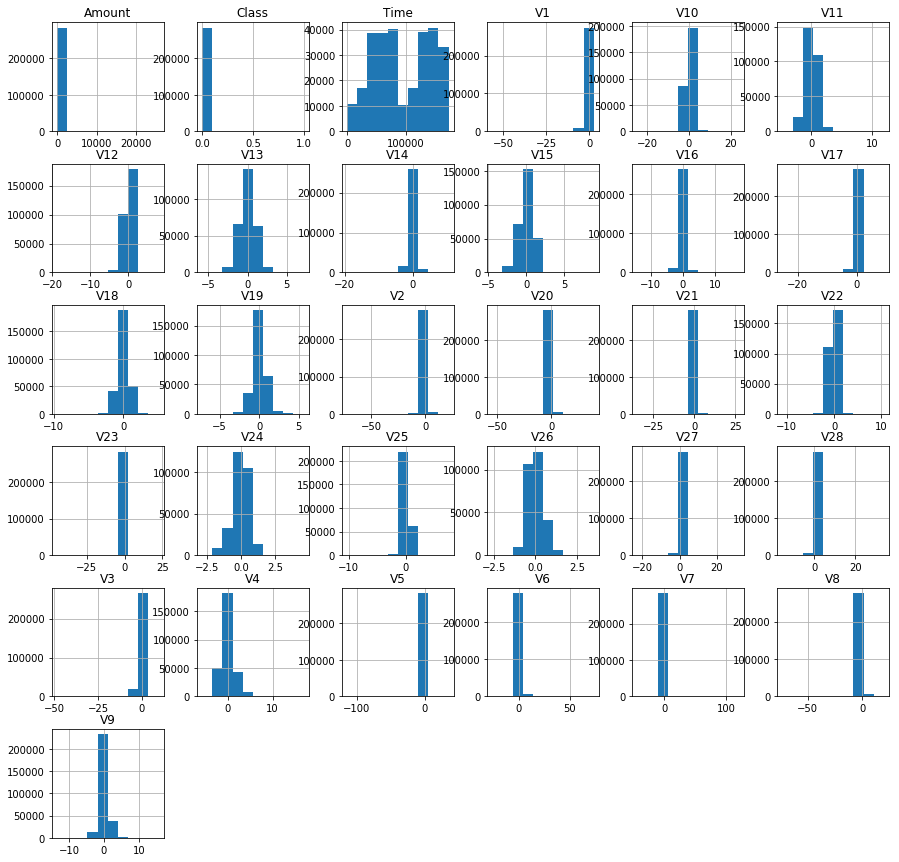

In [10]:
data.hist(figsize=(15,15));

In [11]:
# Start exploring the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [12]:
# Print the shape of the data
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

# V1 - V28 are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

(28481, 31)
                Time            V1      ...             Amount         Class
count   28481.000000  28481.000000      ...       28481.000000  28481.000000
mean    94705.035216     -0.001143      ...          89.957884      0.001720
std     47584.727034      1.994661      ...         270.894630      0.041443
min         0.000000    -40.470142      ...           0.000000      0.000000
25%     53924.000000     -0.908809      ...           5.980000      0.000000
50%     84551.000000      0.031139      ...          22.350000      0.000000
75%    139392.000000      1.320048      ...          78.930000      0.000000
max    172784.000000      2.411499      ...       19656.530000      1.000000

[8 rows x 31 columns]


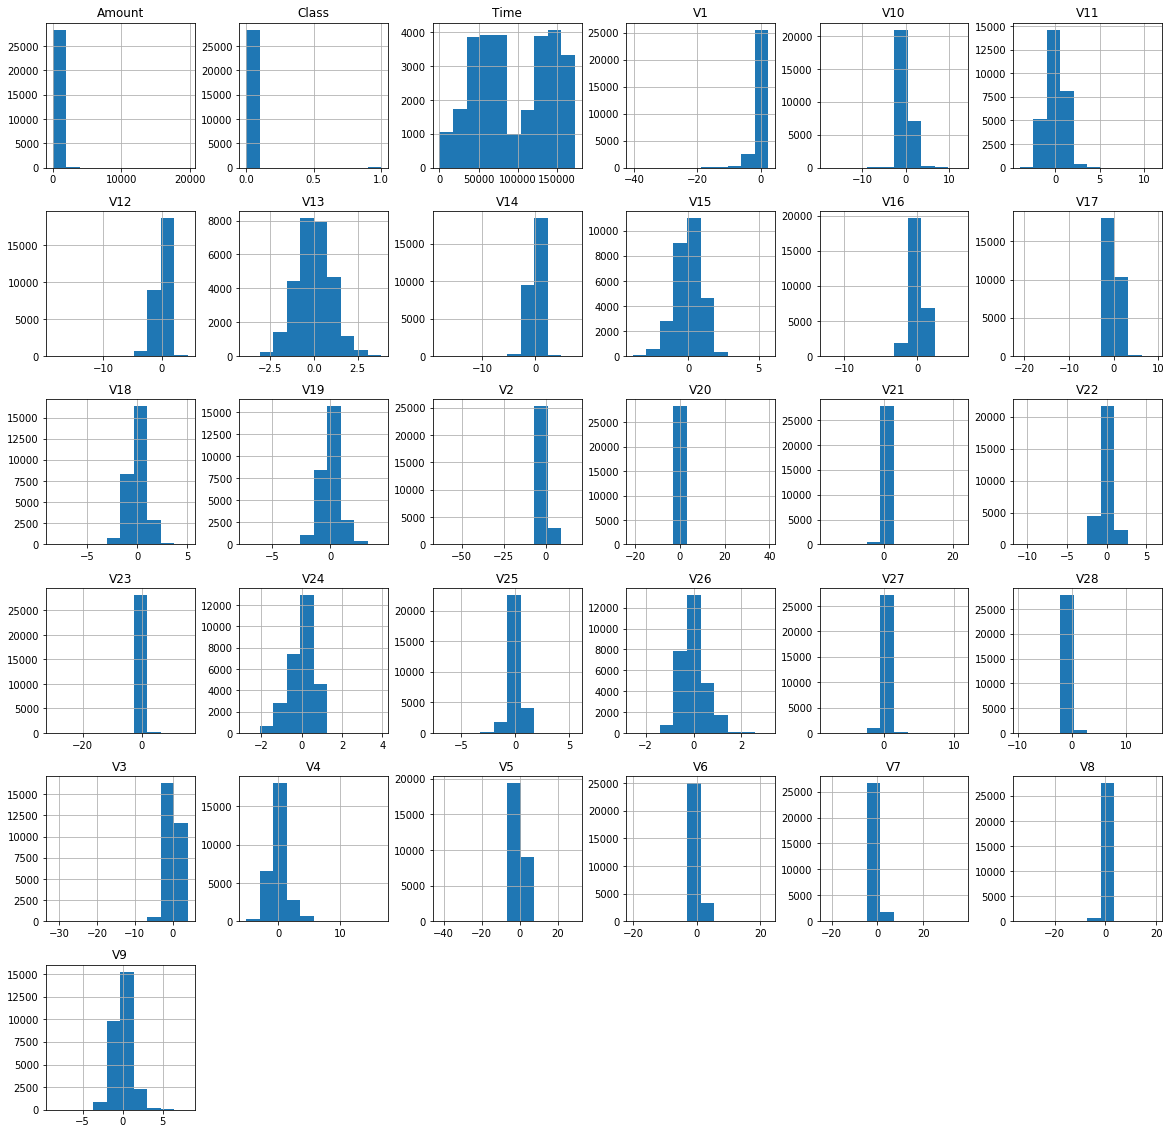

In [13]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

In [14]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017234102419808666
Fraud Cases: 49
Valid Transactions: 28432


In [15]:
# Correlation matrix
corrmat = data.corr()
corrmat

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.126475,-0.001584,-0.413547,-0.104527,0.182205,-0.060483,0.078924,-0.040474,-0.008428,0.035939,-0.237613,0.126985,-0.069353,-0.093264,-0.182255,0.007392,-0.074555,0.083959,0.019469,-0.050967,0.041323,0.150603,0.047941,-0.020018,-0.229491,-0.048131,-0.005541,-0.004339,-0.026969,-0.005087
V1,0.126475,1.000000,0.048796,0.015452,-0.010592,0.019888,0.006417,-0.020583,-0.003013,0.001658,0.010686,0.007177,-0.012290,-0.018849,-0.001905,-0.012884,-0.015569,-0.009644,-0.011822,0.003860,-0.017883,-0.016415,0.014896,0.049447,-0.003709,0.014055,0.007203,-0.011545,0.085035,-0.262703,-0.079820
V2,-0.001584,0.048796,1.000000,0.027270,-0.022539,0.009666,-0.004411,-0.013456,0.015662,0.003456,0.017218,-0.002982,0.000646,0.001655,-0.006617,0.002046,-0.003062,0.003567,-0.005922,0.011950,-0.054467,-0.020127,0.021923,0.047591,-0.011386,0.011838,0.005366,-0.009611,0.084873,-0.556401,0.069598
V3,-0.413547,0.015452,0.027270,1.000000,-0.005423,0.013997,-0.006903,-0.024640,-0.025529,0.002525,-0.006955,0.000836,-0.008236,0.004030,-0.016702,0.004421,-0.012780,-0.017722,0.001056,0.020282,0.003068,-0.006083,0.014177,0.042603,-0.001883,0.005975,0.006869,-0.017094,0.029973,-0.225099,-0.160051
V4,-0.104527,-0.010592,-0.022539,-0.005423,1.000000,-0.003708,0.002029,0.004432,0.011659,-0.004395,-0.000669,0.007657,0.005942,-0.011637,0.003485,-0.000575,-0.004783,0.012553,0.001852,0.001759,0.015348,-0.004423,-0.011251,-0.017682,0.001829,-0.009692,0.004087,0.024489,-0.024554,0.111692,0.122631
V5,0.182205,0.019888,0.009666,0.013997,-0.003708,1.000000,-0.016656,-0.037463,-0.013263,-0.008506,0.011446,0.006286,-0.011393,-0.002728,0.001548,-0.006731,-0.014823,-0.013090,0.000902,0.001468,0.005350,0.002288,0.022065,0.064703,-0.007184,0.006493,0.000048,-0.027934,0.010991,-0.397437,-0.073519
V6,-0.060483,0.006417,-0.004411,-0.006903,0.002029,-0.016656,1.000000,0.006923,0.003695,-0.002762,-0.003120,0.001582,-0.000219,-0.001591,-0.007828,0.006407,0.009237,0.009201,-0.002719,-0.005205,-0.008991,0.004490,-0.003705,-0.036726,0.001428,-0.015012,0.009938,-0.004811,-0.009772,0.213007,-0.035085
V7,0.078924,-0.020583,-0.013456,-0.024640,0.004432,-0.037463,0.006923,1.000000,-0.028291,-0.005510,-0.035149,0.000863,-0.008740,0.002445,-0.001300,-0.003969,-0.010928,-0.017525,-0.015221,0.002621,0.023011,0.007012,-0.013871,-0.055242,0.002899,-0.016941,-0.000075,-0.012973,-0.037593,0.417814,-0.134247
V8,-0.040474,-0.003013,0.015662,-0.025529,0.011659,-0.013263,0.003695,-0.028291,1.000000,-0.018645,-0.017995,-0.002562,-0.009387,0.012011,-0.001876,-0.000946,-0.000048,-0.020343,-0.013191,0.003453,0.013911,-0.005651,-0.004195,0.030092,-0.008821,0.017298,0.015385,0.008495,0.015525,-0.102221,0.024896
V9,-0.008428,0.001658,0.003456,0.002525,-0.004395,-0.008506,-0.002762,-0.005510,-0.018645,1.000000,-0.021718,0.000587,0.002794,0.001733,0.004310,-0.014436,0.000286,-0.007033,-0.001036,-0.003865,-0.012547,0.009462,-0.002297,0.002360,0.007441,-0.009149,-0.003652,-0.011701,-0.026290,-0.039773,-0.079962


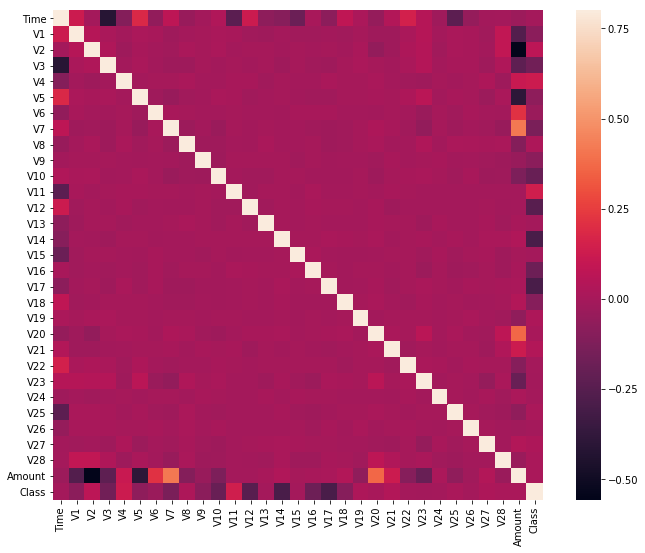

In [16]:
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [17]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


## 3. Unsupervised Outlier Detection

Now that we have processed our data, we can begin deploying our machine learning algorithms.  We will use the following techniques: 

**Local Outlier Factor (LOF)**

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a 
given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the 
object is with respect to the surrounding neighborhood.


**Isolation Forest Algorithm**

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting 
a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to 
isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees 
collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [18]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [19]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



<Figure size 648x504 with 0 Axes>

In [20]:
1000/6

166.66666666666666